In [1]:
# Initial imports.
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from path import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Loading data
file_path = Path("Resource/Bike_weather_merge.csv")
df_bike = pd.read_csv(file_path)
df_bike.head()

,Date,counts_trips,counts_Bike,trip_duration,counts_member_annual,counts_member_casual,W_Temp_Max,W_Temp_Avg,W_Temp_Min,W_Max_wind,...,W_Min_wind,W_Wind_Gust,W_Air_Pressure,W_Snow_Depth,W_Max_humid,W_Avg_humid,W_Min_humid,W_Max_Dp,W_Avg_dp,W_Min_Dp
0,1/1/2019,1064,674,1121463,897,167,5.2,-1.4,-8.0,37.0,...,3.2,58,1015.1,0,100,85.5,64,6.1,-0.6,-11.1
1,1/2/2019,2290,1135,2838818,2207,83,-0.5,-4.9,-9.3,20.9,...,8.0,0,1023.0,0,100,84.0,74,0.0,-5.1,-11.1
2,1/3/2019,2279,955,1650338,2228,51,0.8,-1.0,-2.8,37.0,...,0.0,46,1013.3,30,100,86.0,69,0.0,-1.9,-5.0
3,1/4/2019,3290,1381,2269606,3130,160,8.0,3.6,-0.8,29.0,...,8.0,54,1007.6,30,87,80.7,70,2.2,0.1,-1.1
4,1/5/2019,2160,1053,1468872,1937,223,4.0,1.2,-1.7,32.2,...,3.2,33,1006.1,0,93,83.7,75,1.1,-0.1,-1.1


In [3]:
# print descriptive statistics
df_bike.describe()

,counts_trips,counts_Bike,trip_duration,counts_member_annual,counts_member_casual,W_Temp_Max,W_Temp_Avg,W_Temp_Min,W_Max_wind,W_Avg_wind,W_Min_wind,W_Wind_Gust,W_Air_Pressure,W_Snow_Depth,W_Max_humid,W_Avg_humid,W_Min_humid,W_Max_Dp,W_Avg_dp,W_Min_Dp
count,1096.000000,1096.000000,1.096000e+03,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,8143.673358,2384.500912,8.816010e+06,5357.697080,2785.976277,13.862226,9.362135,4.831934,30.265967,16.857299,4.785036,39.739051,1013.536223,10.766423,88.359489,74.065420,55.019161,7.641697,4.691971,0.692609
std,5624.904061,1093.236101,7.569560e+06,3159.017992,3066.621434,11.167880,10.433345,9.936861,11.451186,7.502697,5.302576,20.369181,53.621195,34.748361,11.322679,13.073749,16.809939,9.426344,9.717489,10.600623
min,222.000000,178.000000,1.428770e+05,218.000000,0.000000,-15.400000,-19.000000,-22.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.900000,-23.300000,-27.800000
25%,3259.500000,1466.750000,2.780107e+06,2625.750000,392.000000,4.100000,1.000000,-2.500000,22.500000,11.600000,0.000000,35.000000,1011.600000,0.000000,81.000000,66.150000,46.000000,1.100000,-2.525000,-7.200000
50%,6884.500000,2333.500000,6.503272e+06,4822.500000,1570.500000,13.750000,8.800000,4.400000,27.400000,15.300000,3.200000,42.000000,1015.900000,0.000000,93.000000,75.300000,56.000000,7.200000,4.000000,0.000000
75%,12432.000000,3274.500000,1.332295e+07,8353.000000,4407.750000,23.825000,18.900000,13.900000,37.000000,20.400000,8.000000,52.000000,1020.900000,0.000000,100.000000,83.900000,66.000000,16.100000,13.200000,10.000000
max,27346.000000,4776.000000,4.486056e+07,13079.000000,15952.000000,35.500000,28.400000,23.700000,82.100000,49.100000,33.800000,96.000000,1043.900000,380.000000,100.000000,98.500000,93.000000,25.000000,22.800000,22.200000


In [4]:
# check the datatypes of each variable
df_bike.dtypes

Date                     object
counts_trips              int64
counts_Bike               int64
trip_duration             int64
counts_member_annual      int64
counts_member_casual      int64
W_Temp_Max              float64
W_Temp_Avg              float64
W_Temp_Min              float64
W_Max_wind              float64
W_Avg_wind              float64
W_Min_wind              float64
W_Wind_Gust               int64
W_Air_Pressure          float64
W_Snow_Depth              int64
W_Max_humid               int64
W_Avg_humid             float64
W_Min_humid               int64
W_Max_Dp                float64
W_Avg_dp                float64
W_Min_Dp                float64
dtype: object

In [63]:
# Define the features set.
X = df_bike.copy()
X = X.drop(["W_Temp_Max","W_Temp_Min","W_Max_wind","W_Min_wind","W_Max_humid","W_Min_humid",
           "W_Max_Dp","W_Min_Dp","Date","trip_duration","counts_member_annual","counts_member_casual"], axis="columns")
X.head()

,counts_trips,counts_Bike,W_Temp_Avg,W_Avg_wind,W_Wind_Gust,W_Air_Pressure,W_Snow_Depth,W_Avg_humid,W_Avg_dp
0,1064,674,-1.4,21.4,58,1015.1,0,85.5,-0.6
1,2290,1135,-4.9,11.9,0,1023.0,0,84.0,-5.1
2,2279,955,-1.0,18.2,46,1013.3,30,86.0,-1.9
3,3290,1381,3.6,18.8,54,1007.6,30,80.7,0.1
4,2160,1053,1.2,16.3,33,1006.1,0,83.7,-0.1


In [72]:
# Define the target set.
y = df_bike["counts_trips"]
y[:5]

array([1064, 2290, 2279, 3290, 2160], dtype=int64)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
clf = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.0


In [75]:
feature_importances = clf.feature_importances_

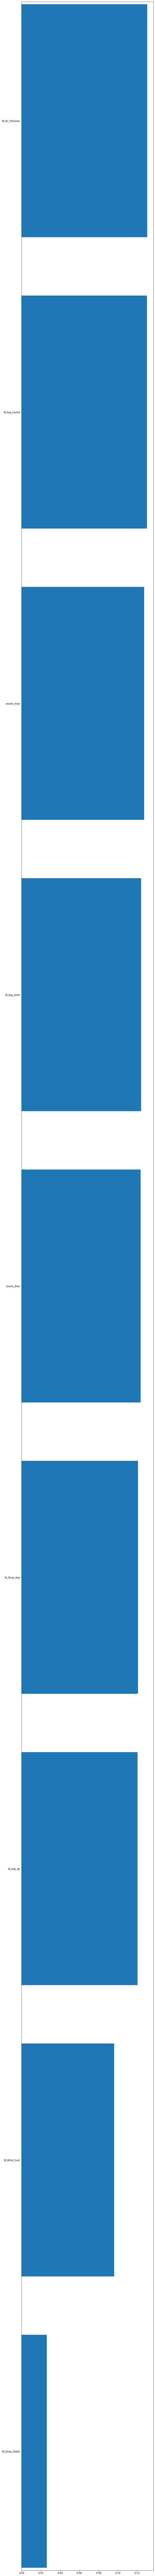

In [76]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [77]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=1))

In [78]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

C:\Users\S.Patel\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [79]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.24574209245742093
Testing Score: 0.0


C:\Users\S.Patel\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123,test_size=0.2)


In [39]:
X_train.shape

(876, 7)

In [40]:
X_test.shape

(220, 7)

In [41]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)

In [42]:
test_scaled = scaler.transform(X_test)

In [43]:
tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()

In [44]:
tree_model.fit(train_scaled, y_train)
rf_model.fit(train_scaled, y_train)

RandomForestRegressor()

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [46]:
tree_mse = mean_squared_error(y_train, tree_model.predict(train_scaled))
tree_mae = mean_absolute_error(y_train, tree_model.predict(train_scaled))
rf_mse = mean_squared_error(y_train, rf_model.predict(train_scaled))
rf_mae = mean_absolute_error(y_train, rf_model.predict(train_scaled))

In [47]:
from math import sqrt

In [48]:
print("Decision Tree training mse = ",tree_mse," & mae = ",tree_mae," & rmse = ", sqrt(tree_mse))
print("Random Forest training mse = ",rf_mse," & mae = ",rf_mae," & rmse = ", sqrt(rf_mse))

Decision Tree training mse =  0.0  & mae =  0.0  & rmse =  0.0
Random Forest training mse =  1146519.5869942922  & mae =  745.5278310502283  & rmse =  1070.75654889162


In [86]:
tree_test_mse = mean_squared_error(y_test, tree_model.predict(test_scaled))
tree_test_mae = mean_absolute_error(y_test, tree_model.predict(test_scaled))
rf_test_mse = mean_squared_error(y_test, rf_model.predict(test_scaled))
rf_test_mae = mean_absolute_error(y_test, rf_model.predict(test_scaled))